### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [269]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [273]:
data = pd.read_csv('C:/Users/yasho/OneDrive/Desktop\Berkeley\Module5-  Application1/assignment_5_1_starter/data/coupons.csv')

In [275]:
data.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [278]:
data.info()
#checking missing data
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [281]:
# keeping the dataframe same as missing values are in coulumns car, Bar, CoffeeHouse, CarryAway
data1 = data

4. What proportion of the total observations chose to accept the coupon? 



In [284]:
#Calculating the proportion of the total people chose to accept the coupon
print("\n value count on people who accepted coupons")
coupons = data1.query('Y == 1')
coupons_accepted = coupons['Y'].size
print(coupons_accepted)
print(type(coupons_accepted))

print("\n value count on total peoplein the data set")
passanger_count = data1['Y'].size
print(passanger_count)
print(type(passanger_count))

percentage_of_accepted_coupon = (coupons_accepted/passanger_count)*100

print("percentage of people accepted coupon =  ", percentage_of_accepted_coupon, "%")


 value count on people who accepted coupons
7210
<class 'int'>

 value count on total peoplein the data set
12684
<class 'int'>
percentage of people accepted coupon =   56.84326710816777 %


5. Use a bar plot to visualize the `coupon` column.

'\nfig = px.bar(data1, x="coupon")\nfig.update_layout(xaxis_title="Categories of Coupons",\n                  font=dict(\n                     family="Courier New, monospace",\n                     size=18,\n                     color="RebeccaPurple"))\nfig.show()\n'

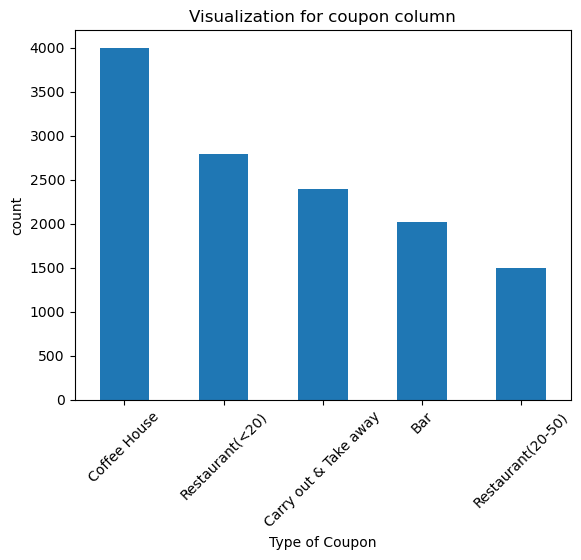

In [287]:
#Using the bar plot on datafram coupon colum for visualization
ax = data1['coupon'].value_counts().plot.bar(y='count',rot=45,stacked=True)
plt.ylabel("count")
plt.xlabel("Type of Coupon")
plt.title("Visualization for coupon column")
"""
fig = px.bar(data1, x="coupon")
fig.update_layout(xaxis_title="Categories of Coupons",
                  font=dict(
                     family="Courier New, monospace",
                     size=18,
                     color="RebeccaPurple"))
fig.show()
"""

6. Use a histogram to visualize the temperature column.

C:\Users\yasho\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Text(0.5, 1.0, 'histogram visualize of the temperature column')

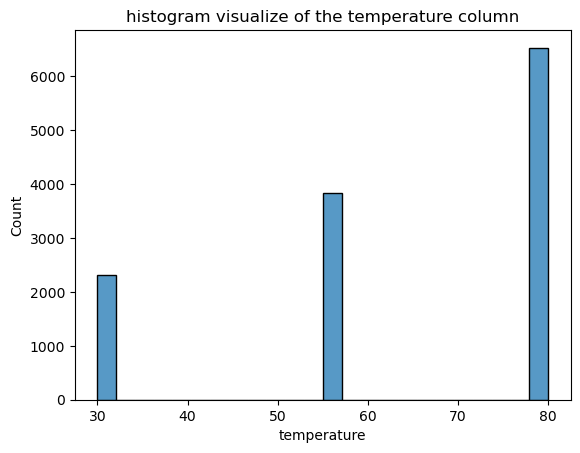

In [290]:
#Using the histogram plot from seaborn lin on datafram temperature colum for visualization
ax = sns.histplot(data=data1,x="temperature")
plt.title("histogram visualize of the temperature column")

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [297]:
#Creating a new DataFrame that contains just the bar coupons
df_bar_coupon = data1[data1['coupon'].str.startswith('B')]
print(type(df_bar_coupon))
print(df_bar_coupon['coupon'].value_counts())
total_bar_coupons = df_bar_coupon['coupon'].size

print("Total bar coupons = ", total_bar_coupons)
df_bar_coupon.info()

<class 'pandas.core.frame.DataFrame'>
coupon
Bar    2017
Name: count, dtype: int64
Total bar coupons =  2017
<class 'pandas.core.frame.DataFrame'>
Index: 2017 entries, 9 to 12682
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2017 non-null   object
 1   passanger             2017 non-null   object
 2   weather               2017 non-null   object
 3   temperature           2017 non-null   int64 
 4   time                  2017 non-null   object
 5   coupon                2017 non-null   object
 6   expiration            2017 non-null   object
 7   gender                2017 non-null   object
 8   age                   2017 non-null   object
 9   maritalStatus         2017 non-null   object
 10  has_children          2017 non-null   int64 
 11  education             2017 non-null   object
 12  occupation            2017 non-null   object
 13  income                2017 non-nu

2. What proportion of bar coupons were accepted?


In [300]:
#Calculating % of bar coupons accepted
bar_coupons = df_bar_coupon.query('Y == 1')
bar_coupons_accepted = bar_coupons['coupon'].size
print("bar coupons accepted = ",bar_coupons_accepted)
print(type(bar_coupons_accepted))

print("Portion of bar coupons accepted", ((bar_coupons_accepted/total_bar_coupons)*100), "%")

bar coupons accepted =  827
<class 'int'>
Portion of bar coupons accepted 41.00148735746158 %


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [496]:
data1 = data

#Getting the cpount for people who went less than 3 times to Bar
df_with_less_than_3_times = df_bar_coupon.query('Bar == "never" or Bar == "less1" or Bar == "1~3"')
print(type(df_with_less_than_3_times))
print(df_with_less_than_3_times['Bar'].value_counts())
cnt_with_less_than_3_times =  df_with_less_than_3_times['Bar'].size
print("people who went less than 3 times to Bar = ", cnt_with_less_than_3_times)
#Getting the cpount for people who went less than 3 times to Bar and accepted coupon
df_with_less_than_3_times_accpeted_coupon = df_with_less_than_3_times.query('Y == 1')
cnt_with_less_than_3_times_accpeted_coupon = df_with_less_than_3_times_accpeted_coupon['Y'].size
print("people who went less than 3 times to Bar and accepted coupon = ", cnt_with_less_than_3_times_accpeted_coupon)
print("Portion of people who went less than 3 times to Bar and accepted coupon", ((cnt_with_less_than_3_times_accpeted_coupon/cnt_with_less_than_3_times)*100), "%")

#Getting the count for people who went more than 3 times to Bar
df_with_more_than_3_times = df_bar_coupon.query('Bar == "4~8" or Bar == "gt8"')
print(type(df_with_more_than_3_times))                                 
print(df_with_more_than_3_times['Bar'].value_counts())
cnt_with_more_than_3_times =  df_with_more_than_3_times['Bar'].size
print("people who went more than 3 times to Bar = ", cnt_with_more_than_3_times)
#Getting the cpount for people who went more than 3 times to Bar and accepted coupon
df_with_more_than_3_times_accpeted_coupon = df_with_more_than_3_times.query('Y == 1')
cnt_with_more_than_3_times_accpeted_coupon = df_with_more_than_3_times_accpeted_coupon['Y'].size
print("people who went more than 3 times to Bar and accepted coupon = ", cnt_with_more_than_3_times_accpeted_coupon)
print("Portion of people who went more than 3 times to Bar and accepted coupon", ((cnt_with_more_than_3_times_accpeted_coupon/cnt_with_more_than_3_times)*100), "%")

<class 'pandas.core.frame.DataFrame'>
Bar
never    830
less1    570
1~3      397
Name: count, dtype: int64
people who went less than 3 times to Bar =  1797
people who went less than 3 times to Bar and accepted coupon =  666
Portion of people who went less than 3 times to Bar and accepted coupon 37.061769616026716 %
<class 'pandas.core.frame.DataFrame'>
Bar
4~8    150
gt8     49
Name: count, dtype: int64
people who went more than 3 times to Bar =  199
people who went more than 3 times to Bar and accepted coupon =  153
Portion of people who went more than 3 times to Bar and accepted coupon 76.88442211055276 %


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [514]:
#Finding acceptance rate between drivers who go to a bar more than once a month and are over the age of 25
df_with_more_than_once_above_age_25 = df_bar_coupon.query(' Bar == "4~8" or Bar == "gt8" or Bar == "1~3" and age > "25" ')
print(type(df_with_more_than_once_above_age_25))
print(df_with_more_than_once_above_age_25['Bar'].value_counts())
cnt_with_more_than_once_above_age_25 =  df_with_more_than_once_above_age_25['Bar'].size
print("people who went more than once to Bar & above age 25 = ", cnt_with_more_than_once_above_age_25)
#Getting the cpount for people who went more than once to Bar & above age 25 and accepted coupon
df_with_more_than_once_above_age_25_accpeted_coupon = df_with_more_than_once_above_age_25.query('Y == 1')
cnt_with_more_than_once_above_age_25_accpeted_coupon = df_with_more_than_once_above_age_25_accpeted_coupon['Y'].size
print("people who went more than once to Bar & above age 25 and accepted coupon = ", cnt_with_more_than_once_above_age_25_accpeted_coupon)
print("Portion of people who went more than once to Bar & above age 25 and accepted coupon", ((cnt_with_more_than_once_above_age_25_accpeted_coupon/cnt_with_more_than_once_above_age_25)*100), "%")

print(" Other Case")

#Finding acceptance rate between drivers who go to a bar more than once a month and are below the age of 25
df_with_more_than_once_below_age_25 = df_bar_coupon.query(' Bar == "4~8" or Bar == "gt8" or Bar == "1~3" and age <= "25" ')
print(type(df_with_more_than_once_below_age_25))
print(df_with_more_than_once_below_age_25['Bar'].value_counts())
cnt_with_more_than_once_below_age_25 =  df_with_more_than_once_below_age_25['Bar'].size
print("people who went more than once to Bar & below age 25 = ", cnt_with_more_than_once_below_age_25)
#Getting the cpount for people who went more than once to Bar & below age 25 and accepted coupon
df_with_more_than_once_below_age_25_accpeted_coupon = df_with_more_than_once_below_age_25.query('Y == 1')
cnt_with_more_than_once_below_age_25_accpeted_coupon = df_with_more_than_once_below_age_25_accpeted_coupon['Y'].size
print("people who went more than once to Bar & below age 25 and accepted coupon = ", cnt_with_more_than_once_below_age_25_accpeted_coupon)
print("Portion of people who went more than once to Bar & below age 25 and accepted coupon", ((cnt_with_more_than_once_below_age_25_accpeted_coupon/cnt_with_more_than_once_below_age_25)*100), "%")
"""
Conclusion: There is not much difference between acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others
"""

<class 'pandas.core.frame.DataFrame'>
Bar
1~3    290
4~8    150
gt8     49
Name: count, dtype: int64
people who went more than once to Bar & above age 25 =  489
people who went more than once to Bar & above age 25 and accepted coupon =  342
Portion of people who went more than once to Bar & above age 25 and accepted coupon 69.93865030674846 %
 Other Case
<class 'pandas.core.frame.DataFrame'>
Bar
4~8    150
1~3    107
gt8     49
Name: count, dtype: int64
people who went more than once to Bar & below age 25 =  306
people who went more than once to Bar & below age 25 and accepted coupon =  221
Portion of people who went more than once to Bar & below age 25 and accepted coupon 72.22222222222221 %


'\nConclusion: There is not much difference between acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others\n'

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [500]:
#Finding the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.
data1 = data
print(data1['passanger'].value_counts())
#print(data1['occupation'].value_counts())


df_with_more_than_once = df_bar_coupon.query(' Bar == "4~8" or Bar == "gt8" or Bar == "1~3" ')
df_with_more_than_once_not_kid_passanger = df_with_more_than_once.query(' passanger == "Alone" or passanger == "Friend(s)" or passanger == "Partner" ')
df_with_more_than_once_not_kid_passanger_other_occupation = df_with_more_than_once_not_kid_passanger.query('occupation != "Farming Fishing & Forestry"')
print(type(df_with_more_than_once_not_kid_passanger_other_occupation))
print(df_with_more_than_once_not_kid_passanger_other_occupation['Bar'].value_counts())
cnt_df_with_more_than_once_not_kid_passanger_other_occupation =  df_with_more_than_once_not_kid_passanger_other_occupation['Bar'].size
print("drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry = ", cnt_df_with_more_than_once_not_kid_passanger_other_occupation)
#Getting the cpount for people who went more than once to Bar & above age 25 and accepted coupon
df_with_more_than_once_not_kid_passanger_other_occupation_accpeted_coupon = df_with_more_than_once_not_kid_passanger_other_occupation.query('Y == 1')
cnt_with_more_than_once_not_kid_passanger_other_occupation_accpeted_coupon = df_with_more_than_once_not_kid_passanger_other_occupation_accpeted_coupon['Y'].size
print("drivers who go to bars more than once a month and had passengers that were not a kid and .. and accepted coupon = ", cnt_with_more_than_once_not_kid_passanger_other_occupation_accpeted_coupon)
print("Portion of drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.", ((cnt_with_more_than_once_not_kid_passanger_other_occupation_accpeted_coupon/cnt_df_with_more_than_once_not_kid_passanger_other_occupation)*100), "%")

"""
Conclusion: There is not much difference between acceptance rate between drivers who go to a bar more than once a month and had a passanger along with them. 
The exclusing the occupation of farming, fishing, or forestry doesn't affect the acceptance rate.
"""

passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Bar
1~3    360
4~8    143
gt8     48
Name: count, dtype: int64
drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry =  551
drivers who go to bars more than once a month and had passengers that were not a kid and .. and accepted coupon =  393
Portion of drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 71.32486388384754 %


"\nConclusion: There is not much difference between acceptance rate between drivers who go to a bar more than once a month and had a passanger along with them. \nThe exclusing the occupation of farming, fishing, or forestry doesn't affect the acceptance rate.\n"

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [506]:
data1 = data
print(data1['maritalStatus'].value_counts())

df_with_more_than_once = df_bar_coupon.query(' Bar == "4~8" or Bar == "gt8" or Bar == "1~3" ')
df_with_more_than_once_not_kid_passanger = df_with_more_than_once.query(' passanger == "Alone" or passanger == "Friend(s)" or passanger == "Partner" ')
df_with_more_than_once_not_kid_passanger_not_widowed = df_with_more_than_once_not_kid_passanger.query('maritalStatus != "Widowed" ')
print(type(df_with_more_than_once_not_kid_passanger_not_widowed))
print(df_with_more_than_once_not_kid_passanger_not_widowed['Bar'].value_counts())
cnt_with_more_than_once_not_kid_passanger_not_widowed =  df_with_more_than_once_not_kid_passanger_not_widowed['Bar'].size
print("drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed ", cnt_with_more_than_once_not_kid_passanger_not_widowed)
#Getting the cpount for people who went more than once to Bar & above age 25 and accepted coupon
df_with_more_than_once_not_kid_passanger_not_widowed_accpeted_coupon = df_with_more_than_once_not_kid_passanger_not_widowed.query('Y == 1')
cnt_with_more_than_once_not_kid_passanger_not_widowed_accpeted_coupon = df_with_more_than_once_not_kid_passanger_not_widowed_accpeted_coupon['Y'].size
print("drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed and accepted coupon = ", cnt_with_more_than_once_not_kid_passanger_not_widowed_accpeted_coupon)
print("Portion of drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed and accepted coupon", ((cnt_with_more_than_once_not_kid_passanger_not_widowed_accpeted_coupon/cnt_with_more_than_once_not_kid_passanger_not_widowed)*100), "%")

"""
Conclusion: There is not much difference between acceptance rate between drivers who go to a bar more than once a month and had a passanger along with them. 
The exclusing the marital status of Widowded doesn't affect the acceptance rate.
"""

maritalStatus
Married partner      5100
Single               4752
Unmarried partner    2186
Divorced              516
Widowed               130
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Bar
1~3    360
4~8    143
gt8     48
Name: count, dtype: int64
drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed  551
drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed and accepted coupon =  393
Portion of drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed and accepted coupon 71.32486388384754 %


"\nConclusion: There is not much difference between acceptance rate between drivers who go to a bar more than once a month and had a passanger along with them. \nThe exclusing the occupation of farming, fishing, or forestry doesn't affect the acceptance rate.\n"

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [508]:
"""
Based on the acceptance rates based on cases 1-6, it is very clear that drivers who go to bars atleast once a month has
~ 71% chance of accepting the Bar coupon.

Passangers, marital status or age doesn't affect the acceptance rate that much.

"""

'\nBased on the acceptance rates based on cases 1-6, it is very clear that drivers who go to bars atleast once a month has\n'

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [538]:
#Finding out how income affects acceptance of coupon
#Finding the acceptance rate for 3 income categories below 1)income less than 50k 2)income between 50k and 100k 3)income more than 100k
data1 = coupons
print(data1['income'].value_counts())
cnt_of_drivers_who_accepted_the_coupons = data1['Y'].size
print("Total number of drivers who accepted the coupons=",cnt_of_drivers_who_accepted_the_coupons)

income
$25000 - $37499     1194
$12500 - $24999     1052
$37500 - $49999     1018
$100000 or More     1004
$50000 - $62499      988
Less than $12500     618
$87500 - $99999      476
$62500 - $74999      446
$75000 - $87499      414
Name: count, dtype: int64
Total number of drivers who accepted the coupons= 7210


Text(0.5, 1.0, 'Visualization for income')

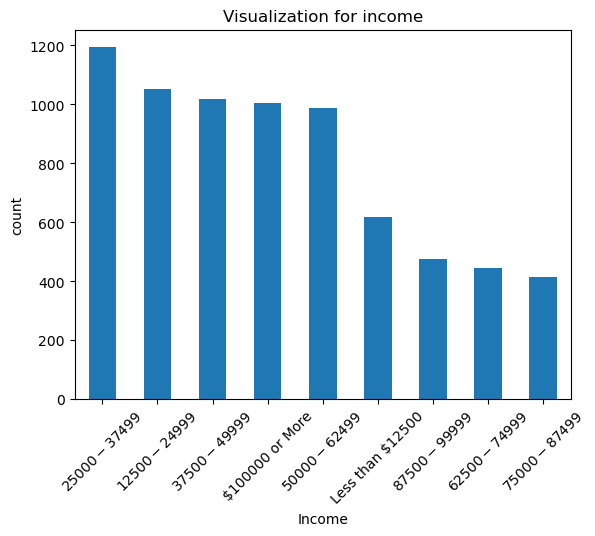

In [524]:
ax = data1['income'].value_counts().plot.bar(y='count',rot=45,stacked=True)
plt.ylabel("count")
plt.xlabel("Income")
plt.title("Visualization for income")

In [548]:
#Total number of drivers who accepted the coupon and has income more than 100k
df_with_income_more_than_100k = data1.query(' income == "$100000 or More" ')
print(type(df_with_income_more_than_100k))
cnt_with_income_more_than_100K_and_accepted_coupon = df_with_income_more_than_100k['income'].size
print("Total number of drivers who accepted the coupon based and has income more than 100k =  ", cnt_with_income_more_than_100K_and_accepted_coupon)
print("Portion of drivers who accepted the coupon and has income more than 100k", ((cnt_with_income_more_than_100K_and_accepted_coupon/cnt_of_drivers_who_accepted_the_coupons)*100), "%")

<class 'pandas.core.frame.DataFrame'>
Total number of drivers who accepted the coupon based and has income more than 100k =   1004
Portion of drivers who accepted the coupon and has income more than 100k 13.9251040221914 %


In [550]:
#Total number of drivers who accepted the coupon and has income between 50k and 100k
df_with_income_between_50k_and_100k= data1.query(' income == "$50000 - $62499" or income == "$62500 - $74999" or income == "$75000 - $87499" or income == "$87500 - $99999" ')
print(type(df_with_income_between_50k_and_100k))
cnt_with_income_between_50k_and_100k_and_accepted_coupon = df_with_income_between_50k_and_100k['income'].size
print("Total number of drivers who accepted the coupon based and has income between 50k and 100k=  ", cnt_with_income_between_50k_and_100k_and_accepted_coupon)
print("Portion of drivers who accepted the coupon based and has income between 50k and 100k", ((cnt_with_income_between_50k_and_100k_and_accepted_coupon/cnt_of_drivers_who_accepted_the_coupons)*100), "%")

<class 'pandas.core.frame.DataFrame'>
Total number of drivers who accepted the coupon based and has income between 50k and 100k=   2324
Portion of drivers who accepted the coupon based and has income between 50k and 100k 32.23300970873787 %


In [554]:
#Total number of drivers who accepted the coupon and has income less than 50k
df_with_income_less_than_50k = data1.query(' income == "Less than $12500" or income == "$12500 - $24999" or income == "$25000 - $37499" or income == "$37500 - $49999" ')
print(type(df_with_income_less_than_50k))
cnt_with_income_less_than_50k_and_accepted_coupon = df_with_income_less_than_50k['income'].size
print("Total number of drivers who accepted the coupon and has income less than 50k =  ", cnt_with_income_less_than_50k_and_accepted_coupon)
print("Portion of drivers who accepted the coupon and has income less than 50k", ((cnt_with_income_less_than_50k_and_accepted_coupon/cnt_of_drivers_who_accepted_the_coupons)*100), "%")

<class 'pandas.core.frame.DataFrame'>
Total number of drivers who accepted the coupon and has income less than 50k =   3882
Portion of drivers who accepted the coupon and has income less than 50k 53.84188626907074 %


In [564]:
"""
Based on the acceptance rates based on 3 income categories , it is very clear that drivers with income less than 50k has ~50% chance pf accepting the accepting the Bar coupon.

"""


'\nBased on the acceptance rates based on 3 income categories , it is very clear that drivers with income less than 50k has ~50% chance pf accepting the accepting the Bar coupon.\n\n'